## K-Means on Wine Data Set

In [448]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

In [449]:
#importing data

red_dataset = pd.read_csv('winequality-red.csv', sep=';')
white_dataset = pd.read_csv('winequality-white.csv', sep=';')


#red & white data merged
wine_dataset = pd.concat([red_dataset, white_dataset])


samples, attributes = wine_dataset.shape


### Finding optimal number of clusters

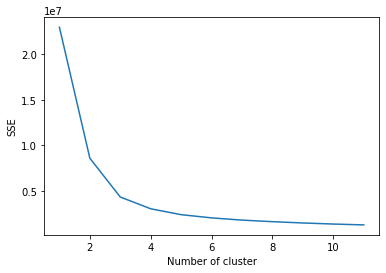

In [450]:
#Using the elbow method to find the optimal k for the dataset
#

sse = {}
for i in range(1, attributes):
    kmeans = KMeans(n_clusters=i, max_iter=1000).fit(wine_dataset)
    sse[i] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Based on the graph above, using the elbow method it is assumed the optimal value for k is around 2 or 3.

### Filtering the Dimensionality based on Correlation and Variance

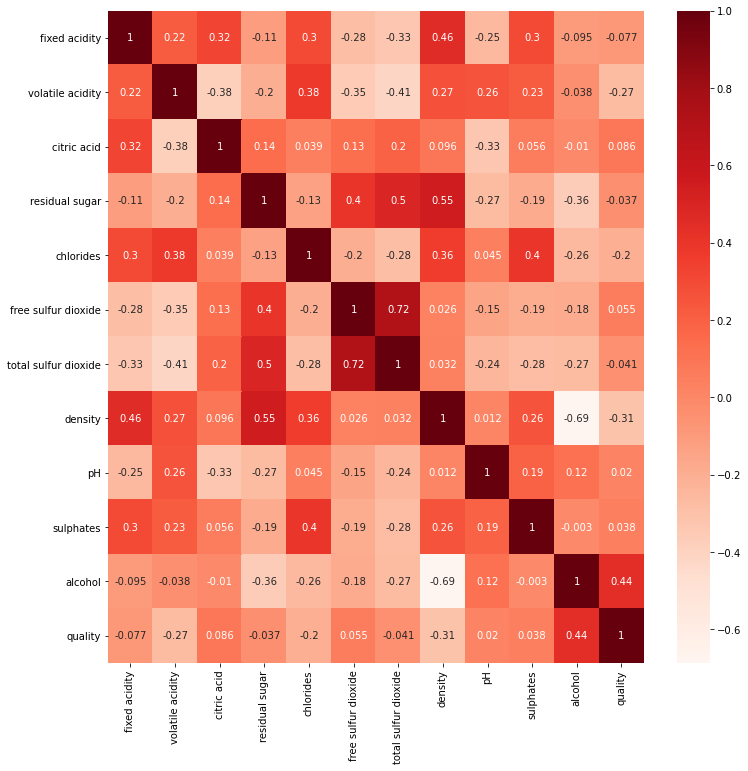

In [451]:
#viewing correlation between attributes

plt.figure(figsize=(attributes,attributes))
att_corr = wine_dataset.corr()
sns.heatmap(att_corr, annot=True, cmap=plt.cm.Reds)
plt.show()

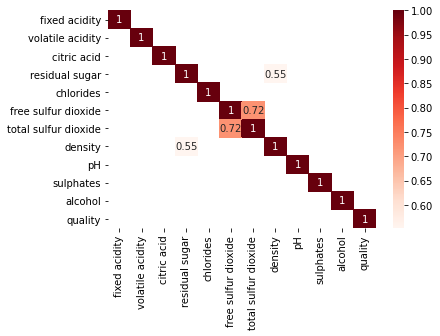

In [452]:
#Selecting highly correlated features
abs_corr = abs(att_corr)
high_corr = att_corr[att_corr>0.5]
sns.heatmap(high_corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [453]:
#viewing variance of each attribute and sorting them
att_var = np.var(wine_dataset, axis=0)
att_var = att_var.sort_values()
print(att_var)

density                    0.000009
chlorides                  0.001227
citric acid                0.021114
sulphates                  0.022140
pH                         0.025849
volatile acidity           0.027101
quality                    0.762457
alcohol                    1.422342
fixed acidity              1.680482
residual sugar            22.633212
free sulfur dioxide      314.992702
total sulfur dioxide    3194.228316
dtype: float64


In [454]:
#Will reduce dimensionality based on both correlation and variance
#through the variance, we see that the 2 highest variance attributes are:
#free sulfur oxide, and total sulfur oxide
#but because the correlation between these two variables are high, we will take
#the free sulfur dioxide, residual sugar, fixed acidity (for 3 dimension plotting)
#and just free sulfur dioxide, residual sugar for 2 dimension plotting

lowD_dataset = wine_dataset.drop(['density', 'chlorides', 'citric acid', 'sulphates', 
                                 'pH', 'volatile acidity', 'quality', 'alcohol', 
                                  'total sulfur dioxide'], axis=1)


lowD_dataset

,fixed acidity,residual sugar,free sulfur dioxide
0,7.4,1.9,11.0
1,7.8,2.6,25.0
2,7.8,2.3,15.0
3,11.2,1.9,17.0
4,7.4,1.9,11.0
...,...,...,...
4893,6.2,1.6,24.0
4894,6.6,8.0,57.0
4895,6.5,1.2,30.0
4896,5.5,1.1,20.0


In [455]:
#Scaling attribute data
lowD_dataset[lowD_dataset.columns] = StandardScaler().fit_transform(lowD_dataset)
lowD_dataset

,fixed acidity,residual sugar,free sulfur dioxide
0,0.142473,-0.744778,-1.100140
1,0.451036,-0.597640,-0.311320
2,0.451036,-0.660699,-0.874763
3,3.073817,-0.744778,-0.762074
4,0.142473,-0.744778,-1.100140
...,...,...,...
4893,-0.783214,-0.807837,-0.367664
4894,-0.474652,0.537425,1.491697
4895,-0.551792,-0.891916,-0.029599
4896,-1.323198,-0.912936,-0.593041


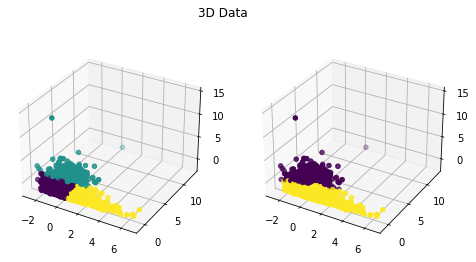

In [456]:
# 3D Data

arr = np.array(lowD_dataset)

fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle('3D Data')

#k = 3
kmeans_3_3 = KMeans(n_clusters=3, random_state=0).fit(arr)
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(arr[:,0], arr[:,1], arr[:,2], c=kmeans_3_3.labels_);

#k = 2
kmeans_3_2 = KMeans(n_clusters=2, random_state=0).fit(arr)
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(arr[:,0], arr[:,1], arr[:,2], c=kmeans_3_2.labels_);

In [457]:
print('With 3D Data and k=3, the cluster centers are: \n', kmeans_3_3.cluster_centers_)
print('With 3D Data and k=2, the cluster centers are: \n', kmeans_3_2.cluster_centers_)

With 3D Data and k=3, the cluster centers are: 
 [[-0.36113358 -0.52571276 -0.25078924]
 [-0.23000009  1.23001645  0.90028243]
 [ 1.77227558 -0.56090387 -0.89683431]]
With 3D Data and k=2, the cluster centers are: 
 [[-0.31134014  1.03072531  0.86739474]
 [ 0.17234635 -0.57057128 -0.48015754]]


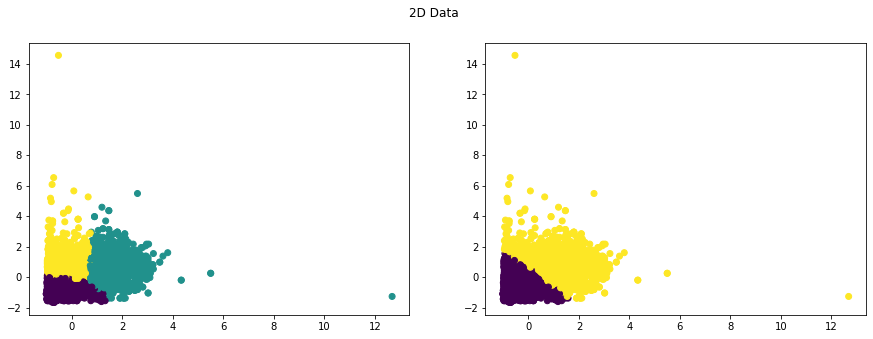

In [458]:
#2D Data
arr = np.array(lowD_dataset.drop(['fixed acidity'], axis=1))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('2D Data')


#k=3

kmeans_2_3 = KMeans(n_clusters=3, random_state=0).fit(arr)

ax1.scatter(arr[:,0], arr[:,1], c=kmeans_2_3.labels_)

#k=2
kmeans_2_2 = KMeans(n_clusters=2, random_state=0).fit(arr)

ax2.scatter(arr[:,0], arr[:,1], c=kmeans_2_2.labels_)

In [459]:
print('With 2D Data and k=3, the cluster centers are: \n', kmeans_2_3.cluster_centers_)
print('With 2D Data and k=2, the cluster centers are: \n', kmeans_2_2.cluster_centers_)

With 2D Data and k=3, the cluster centers are: 
 [[-0.55962277 -0.75596473]
 [ 1.62503251  0.71391035]
 [-0.24210274  0.75926566]]
With 2D Data and k=2, the cluster centers are: 
 [[-0.55440562 -0.45005174]
 [ 1.10548991  0.89740731]]


Using k-means and dimensionality filtering based on correlation and variance does not seem to be an effective way to cluster. There isn't any obvious clusters shown, and although the clustering happening, there are very apparent outliers that aren't properly treated using this method.

### PCA Implementation

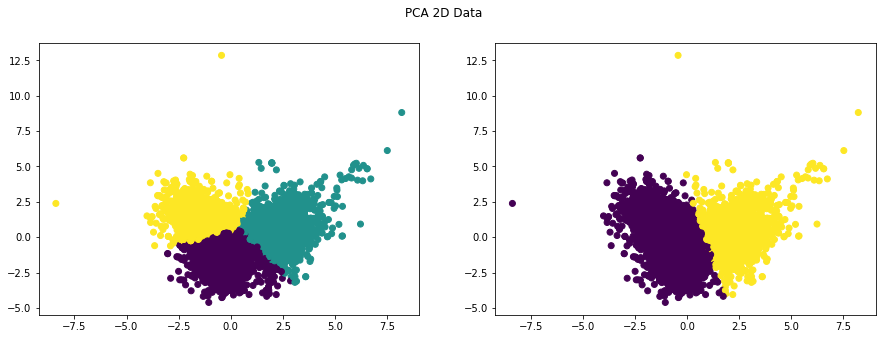

In [475]:
pca_dataset = pd.read_csv('2_PCA.csv')
arr = np.array(pca_dataset)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('PCA 2D Data')

#k=3
kmeans_PCA_3 = KMeans(n_clusters=3, random_state=0).fit(arr)
ax1.scatter(arr[:,0], arr[:,1], c=kmeans_PCA_3.labels_)

#k=2
kmeans_PCA_2 = KMeans(n_clusters=2, random_state=0).fit(arr)
ax2.scatter(arr[:,0], arr[:,1], c=kmeans_PCA_2.labels_)

plt.show()